# Freier Fall – Simulation & Streamlit-App (Colab/Jupyter, **mit Proxy-Fix**)

**Warum `localhost` nicht funktioniert:** In Google Colab laufen Python/Streamlit auf einer entfernten VM.  
`localhost:8501` zeigt auf **dein** Gerät, nicht auf Colab.  
Dieses Notebook startet Streamlit so, dass Colab dir einen **klickbaren Proxy-Link** ausgibt.

**Why `localhost` doesn't work:** In Google Colab, Python/Streamlit runs on a remote VM.
`localhost:8501` points to **your** device, not to Colab.
This notebook starts Streamlit in a way that Colab provides you with a **clickable proxy link**.

---


## 1) Simulation (Euler + Analytik)

In [1]:
# Parameter
y0, v0, g, dt, n = 10.0, 0.0, 9.8, 0.1, 100
print(f"Start: y0={y0} m, v0={v0} m/s, g={g} m/s^2, dt={dt} s, steps={n}")

Start: y0=10.0 m, v0=0.0 m/s, g=9.8 m/s^2, dt=0.1 s, steps=100


In [2]:
# Euler
import numpy as np
t = np.zeros(n+1); y = np.zeros(n+1); v = np.zeros(n+1)
t[0], y[0], v[0] = 0.0, y0, v0
for k in range(n):
    y[k+1] = y[k] + v[k]*dt
    v[k+1] = v[k] - g*dt
    t[k+1] = t[k] + dt
print("Endzeit =", t[-1], "s")

Endzeit = 9.99999999999998 s


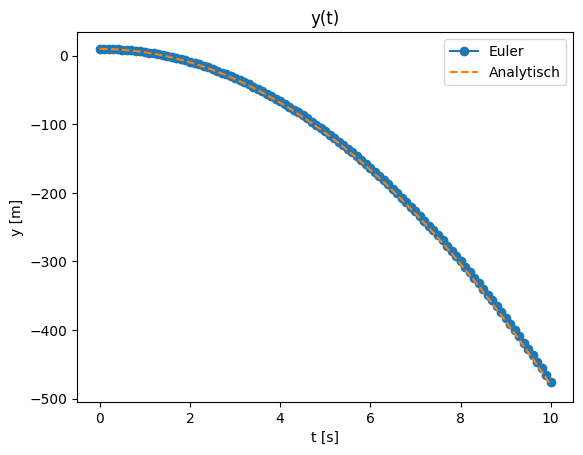

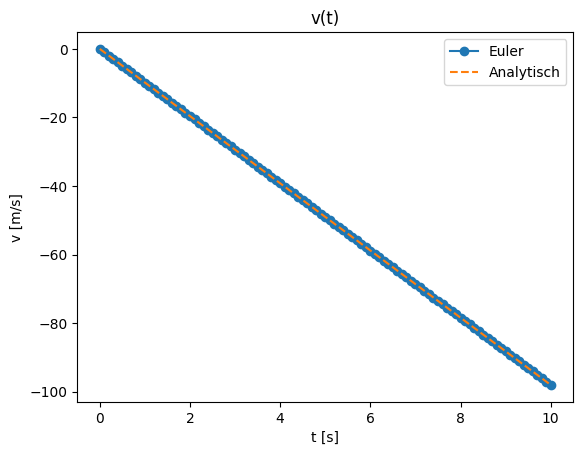

In [3]:
# Vergleich Analytik + Plots
import numpy as np, matplotlib.pyplot as plt
tt = np.linspace(0, t[-1], 500)
yy = y0 + v0*tt - 0.5*g*tt**2
vv = v0 - g*tt

plt.figure()
plt.plot(t, y, marker='o', linestyle='-', label='Euler')
plt.plot(tt, yy, linestyle='--', label='Analytisch')
plt.xlabel('t [s]'); plt.ylabel('y [m]'); plt.title('y(t)'); plt.legend(); plt.show()

plt.figure()
plt.plot(t, v, marker='o', linestyle='-', label='Euler')
plt.plot(tt, vv, linestyle='--', label='Analytisch')
plt.xlabel('t [s]'); plt.ylabel('v [m/s]'); plt.title('v(t)'); plt.legend(); plt.show()

In [7]:
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt

st.set_page_config(page_title="Freier Fall – Euler-Simulation", layout="wide")
st.title("🪂 Freier Fall simulieren (Euler-Verfahren)")
st.write("Dieses Tool simuliert den freien Fall (Euler) und vergleicht mit der analytischen Lösung.")

st.sidebar.header("Parameter")
y0 = st.sidebar.number_input("y₀ [m]", value=10.0, step=0.5)
v0 = st.sidebar.number_input("v₀ [m/s]", value=0.0, step=0.5)
g  = st.sidebar.number_input("g [m/s²]", value=9.8, step=0.1, min_value=0.0)
dt = st.sidebar.number_input("Δt [s]", value=0.1, step=0.01, min_value=1e-6, format="%.4f")
n  = st.sidebar.number_input("Schritte n", value=100, step=10, min_value=1)

def simulate(y0, v0, g, dt, n):
    t = np.zeros(n+1); y = np.zeros(n+1); v = np.zeros(n+1)
    t[0], y[0], v[0] = 0.0, y0, v0
    for k in range(n):
        y[k+1] = y[k] + v[k]*dt
        v[k+1] = v[k] - g*dt
        t[k+1] = t[k] + dt
    return t, y, v

t, y, v = simulate(y0, v0, g, dt, int(n))
tt = np.linspace(0, t[-1], 500)
yy = y0 + v0*tt - 0.5*g*tt**2
vv = v0 - g*tt

col1, col2 = st.columns(2)
with col1:
    st.subheader("y(t)")
    fig, ax = plt.subplots()
    ax.plot(t, y, marker='o', linestyle='-', label='Euler')
    ax.plot(tt, yy, linestyle='--', label='Analytisch')
    ax.set_xlabel('t [s]'); ax.set_ylabel('y [m]'); ax.legend()
    st.pyplot(fig, clear_figure=True)
with col2:
    st.subheader("v(t)")
    fig2, ax2 = plt.subplots()
    ax2.plot(t, v, marker='o', linestyle='-', label='Euler')
    ax2.plot(tt, vv, linestyle='--', label='Analytisch')
    ax2.set_xlabel('t [s]'); ax2.set_ylabel('v [m/s]'); ax2.legend()
    st.pyplot(fig2, clear_figure=True)

st.dataframe({'t [s]': t, 'y [m]': y, 'v [m/s]': v})

2025-10-19 14:11:15.740 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 14:11:15.741 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 14:11:15.742 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 14:11:15.743 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 14:11:15.744 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 14:11:15.744 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 14:11:15.745 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 14:11:15.746 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

## 2) App-Dateien schreiben

In [4]:
# Schreibt app.py & requirements.txt
from pathlib import Path

app_py = r"""import numpy as np
import streamlit as st
import matplotlib.pyplot as plt

st.set_page_config(page_title="Freier Fall – Euler-Simulation", layout="wide")
st.title("🪂 Freier Fall simulieren (Euler-Verfahren)")
st.write("Dieses Tool simuliert den freien Fall (Euler) und vergleicht mit der analytischen Lösung.")

st.sidebar.header("Parameter")
y0 = st.sidebar.number_input("y₀ [m]", value=10.0, step=0.5)
v0 = st.sidebar.number_input("v₀ [m/s]", value=0.0, step=0.5)
g  = st.sidebar.number_input("g [m/s²]", value=9.8, step=0.1, min_value=0.0)
dt = st.sidebar.number_input("Δt [s]", value=0.1, step=0.01, min_value=1e-6, format="%.4f")
n  = st.sidebar.number_input("Schritte n", value=100, step=10, min_value=1)

def simulate(y0, v0, g, dt, n):
    t = np.zeros(n+1); y = np.zeros(n+1); v = np.zeros(n+1)
    t[0], y[0], v[0] = 0.0, y0, v0
    for k in range(n):
        y[k+1] = y[k] + v[k]*dt
        v[k+1] = v[k] - g*dt
        t[k+1] = t[k] + dt
    return t, y, v

t, y, v = simulate(y0, v0, g, dt, int(n))
tt = np.linspace(0, t[-1], 500)
yy = y0 + v0*tt - 0.5*g*tt**2
vv = v0 - g*tt

col1, col2 = st.columns(2)
with col1:
    st.subheader("y(t)")
    fig, ax = plt.subplots()
    ax.plot(t, y, marker='o', linestyle='-', label='Euler')
    ax.plot(tt, yy, linestyle='--', label='Analytisch')
    ax.set_xlabel('t [s]'); ax.set_ylabel('y [m]'); ax.legend()
    st.pyplot(fig, clear_figure=True)
with col2:
    st.subheader("v(t)")
    fig2, ax2 = plt.subplots()
    ax2.plot(t, v, marker='o', linestyle='-', label='Euler')
    ax2.plot(tt, vv, linestyle='--', label='Analytisch')
    ax2.set_xlabel('t [s]'); ax2.set_ylabel('v [m/s]'); ax2.legend()
    st.pyplot(fig2, clear_figure=True)

st.dataframe({'t [s]': t, 'y [m]': y, 'v [m/s]': v})
"""

reqs = "streamlit\nnumpy\nmatplotlib\n"

Path("app.py").write_text(app_py, encoding="utf-8")
Path("requirements.txt").write_text(reqs, encoding="utf-8")
print("Dateien erstellt: app.py, requirements.txt")

Dateien erstellt: app.py, requirements.txt


## 3) Streamlit starten (Colab-Proxy-Link erzeugen)

In [ ]:

# Install Streamlit (if not already installed)
!pip -q install streamlit

import subprocess, threading, time
from google.colab import output
from IPython.display import display, HTML

def run_streamlit():
    # Important: bind to 0.0.0.0 so Colab's proxy can access it
    cmd = [
        "streamlit", "run", "app.py",
        "--server.port", "8501",
        "--server.address", "0.0.0.0",
        "--server.headless", "true",
        "--server.enableCORS", "false",
        "--server.enableXsrfProtection", "false",
        "--browser.gatherUsageStats", "false",
    ]
    subprocess.Popen(cmd)

threading.Thread(target=run_streamlit, daemon=True).start()

# Give Streamlit a moment to start
time.sleep(3)

# Get the proxied URL that works inside Colab (NOT localhost)
url = output.eval_js("google.colab.kernel.proxyPort(8501)")
display(HTML(f'<p>✅ Streamlit läuft! Öffne die App hier: <a href="{url}" target="_blank">{url}</a></p>'))


^C


ModuleNotFoundError: No module named 'google.colab'


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\Dell Latitude\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


## (Optional) 4) Alternativ: Cloudflare-Tunnel starten

In [ ]:

# (Optional) Alternative, falls der Colab-Proxy bei dir geblockt ist: Cloudflare Tunnel
# Liefert eine trycloudflare.com-URL, die überall erreichbar ist.
!wget -q -O cloudflared https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared

# Streamlit im Hintergrund starten (falls noch nicht aktiv)
import subprocess, time
subprocess.Popen([
    "streamlit", "run", "app.py",
    "--server.port", "8501",
    "--server.address", "0.0.0.0",
    "--server.headless", "true",
    "--server.enableCORS", "false",
    "--server.enableXsrfProtection", "false",
    "--browser.gatherUsageStats", "false",
])

time.sleep(2)

# Tunnel starten und die öffentliche URL ausgeben
proc = subprocess.Popen(["./cloudflared", "tunnel", "--url", "http://localhost:8501", "--no-autoupdate"],
                        stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True)
public_url = None
for line in proc.stdout:
    if "trycloudflare.com" in line and "https" in line:
        # Extract first https URL
        start = line.find("https://")
        end = line.find(" ", start)
        if start != -1:
            public_url = line[start:end if end != -1 else None]
            print("🌐 Öffentliche URL:", public_url)
            break
